In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


X = pd.read_csv("movie_cluster_data.csv")

X_numeric = X.drop(columns=["title", "cluster"])
X_numeric.head()

,is_Action,is_Comedy,is_Drama,is_Horror,is_Romance,is_Sci-Fi,popularity,runtime,vote_average
0,0,1,0,0,0,1,53.261330,126.965298,7.419076
1,0,0,0,1,0,0,37.488864,109.612643,6.209725
2,0,0,1,0,1,1,59.240270,91.432315,6.767392
3,1,0,1,0,1,1,48.150979,108.588742,6.821698
4,1,1,1,1,1,1,44.772770,120.990331,5.831910


In [11]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_numeric)

X_scaled

array([[-0.96720415,  0.94169658, -0.96720415, ...,  0.26224026,
         1.65160472,  0.87209107],
       [-0.96720415, -1.06191317, -0.96720415, ..., -1.38276651,
         0.52057886, -0.32894271],
       [-0.96720415, -1.06191317,  1.03390789, ...,  0.88582042,
        -0.66439375,  0.22488882],
       ...,
       [ 1.03390789,  0.94169658, -0.96720415, ..., -0.78918679,
         0.71381577,  0.85705356],
       [-0.96720415,  0.94169658, -0.96720415, ..., -1.12255444,
        -0.02595888, -2.387346  ],
       [ 1.03390789,  0.94169658, -0.96720415, ..., -0.37108044,
        -0.20264471, -1.04345084]], shape=(300, 9))

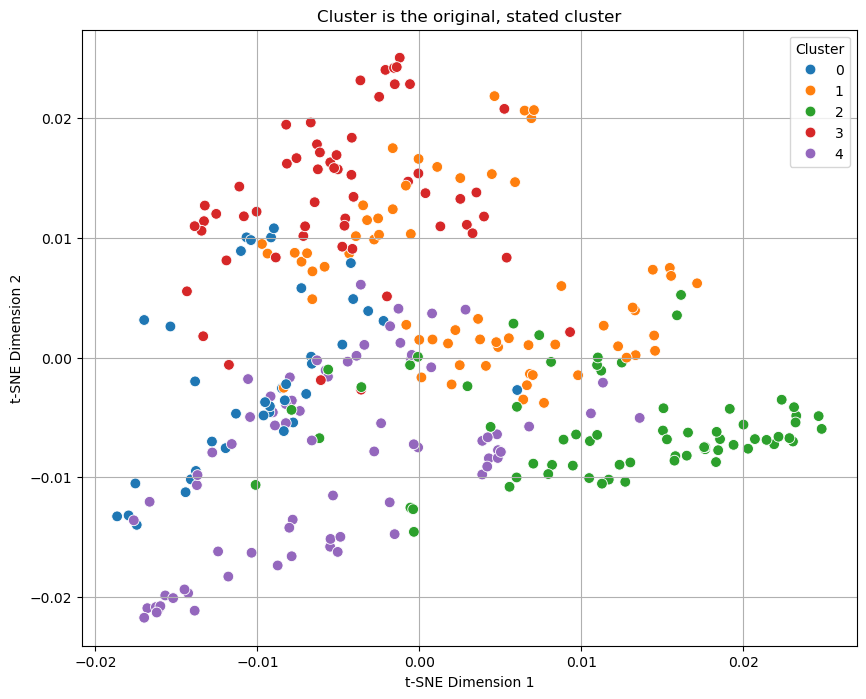

In [15]:
# from sklearn.decomposition import PCA
# X_2D = PCA(n_components=2).fit_transform(X_scaled)

# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
# X_2D = tsne.fit_transform(X_scaled)

# from sklearn.manifold import MDS
# X_2D = MDS(n_components=2, random_state=42).fit_transform(X_scaled)

# from sklearn.manifold import Isomap
# X_2D = Isomap(n_components=2).fit_transform(X_scaled)

from sklearn.manifold import SpectralEmbedding
X_2D = SpectralEmbedding(n_components=2, random_state=42).fit_transform(X_scaled)

# from sklearn.neural_network import MLPRegressor
# ae = MLPRegressor(hidden_layer_sizes=(32,), max_iter=2000, random_state=42)
# ae.fit(X_scaled, X_scaled)
# X_2D = ae.predict(X_scaled)[:, :2]

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=X["cluster"], palette="tab10", s=60)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Cluster is the original, stated cluster')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
